# Plotting
Author: Javier Duarte

## Plotting in `pyROOT`
Here we do standard plotting in `pyROOT`

Welcome to JupyROOT 6.10/09


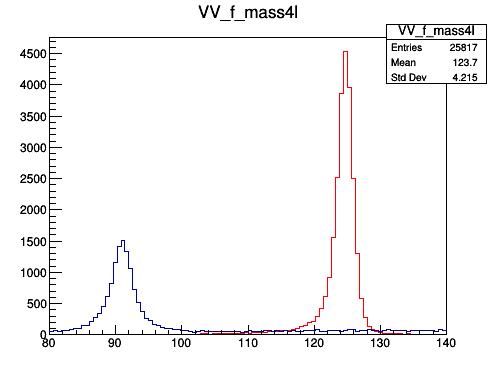

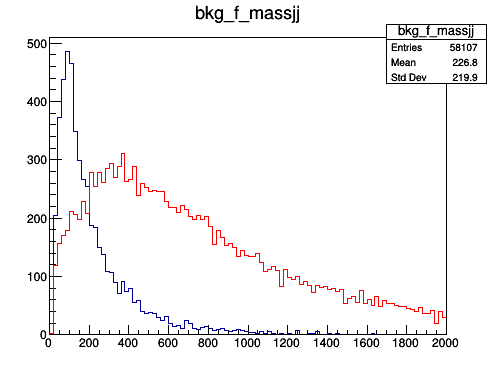

In [1]:
import ROOT as rt

treename = 'HZZ4LeptonsAnalysisReduced'

tfile = {}
tree = {}
hist = {}
tfile['VV'] = rt.TFile.Open('data/ntuple_4mu_VV.root')
tfile['bkg'] = rt.TFile.Open('data/ntuple_4mu_bkg.root')
tree['VV'] = tfile['VV'].Get(treename)
tree['bkg'] = tfile['bkg'].Get(treename)

hist['VV_f_mass4l'] = rt.TH1D('VV_f_mass4l','VV_f_mass4l',100, 80, 140)
hist['bkg_f_mass4l'] = rt.TH1D('bkg_f_mass4l','bkg_f_mass4l',100, 80, 140)

tree['VV'].Project('VV_f_mass4l','f_mass4l') 
tree['bkg'].Project('bkg_f_mass4l','f_mass4l')

hist['VV_f_massjj'] = rt.TH1D('VV_f_massjj','VV_f_massjj',100, 0, 2000)
hist['bkg_f_massjj'] = rt.TH1D('bkg_f_massjj','bkg_f_massjj',100, 0, 2000)

tree['VV'].Project('VV_f_massjj','f_massjj')
tree['bkg'].Project('bkg_f_massjj','f_massjj')

hist['VV_f_mass4l'].SetLineColor(rt.kRed)
hist['VV_f_massjj'].SetLineColor(rt.kRed)

%jsroot off
c1 = rt.TCanvas('c1','c1',500,400)
hist['VV_f_mass4l'].Draw('hist')
hist['bkg_f_mass4l'].Draw('same')
c1.Draw()

c2 = rt.TCanvas('c2','c2',500,400)
hist['bkg_f_massjj'].Draw('hist')
hist['VV_f_massjj'].Draw('same')
c2.Draw()

## Plotting in `matplotlib`
Here we do the analagous plotting in `matplotlib`

In [2]:
import numpy as np
import pandas as pd
import h5py

treename = 'HZZ4LeptonsAnalysisReduced'
filename = {}
h5file = {}
params = {}

filename['bkg'] = 'data/ntuple_4mu_bkg.h5'
filename['VV'] = 'data/ntuple_4mu_VV.h5'

h5file['bkg'] = h5py.File(filename['bkg'], 'r') 
params['bkg'] = h5file['bkg'][treename][()]
h5file['VV'] = h5py.File(filename['VV'], 'r') 
params['VV'] = h5file['VV'][treename][()]

/cvmfs/cms.cern.ch/slc7_amd64_gcc700/lcg/root/6.10.09-omkpbe4/lib/ROOT.py:318: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  return _orig_ihook( name, *args, **kwds )


In [3]:
df = {}
VARS = [ 'f_mass4l', 'f_massjj']
df['bkg'] = pd.DataFrame(params['bkg'],columns=VARS)
df['VV'] = pd.DataFrame(params['VV'],columns=VARS)

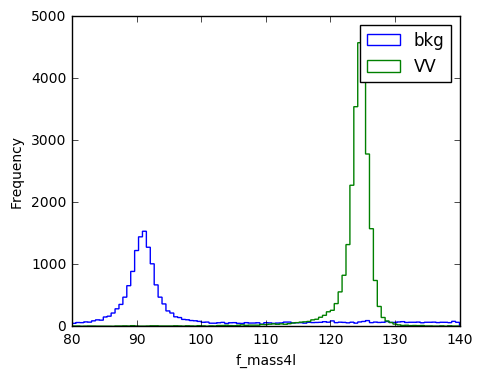

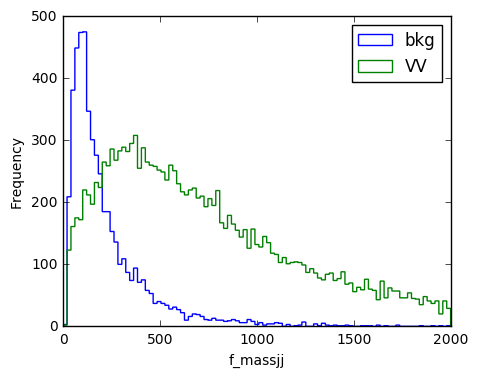

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(5, 4),dpi=100)
plt.xlabel(VARS[0])
bins = np.linspace(80, 140, 100)
df['bkg'][VARS[0]].plot.hist(bins, alpha=1, label='bkg',histtype='step')
df['VV'][VARS[0]].plot.hist(bins, alpha=1, label='VV',histtype='step')
plt.legend(loc='upper right')
plt.figure(figsize=(5, 4),dpi=100)
plt.xlabel(VARS[1])
bins = np.linspace(0, 2000, 100)
df['bkg'][VARS[1]].plot.hist(bins, alpha=1, label='bkg',histtype='step')
df['VV'][VARS[1]].plot.hist(bins, alpha=1, label='VV',histtype='step')
plt.legend(loc='upper right')